# Project: Wrangling and Analyze Data

# Introduction 
The project involve real-world data from tweet archive of Twitter user @dog_rates, also known as WeRateDogs which is a Twitter account that rates people's dogs with a humorous comment about the dog.
In the project, data from three different sources will be gathered, cleaned and analysed to come up with a conclusion about the tweets @WeRateDogs. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import requests
import json
import os
import timeit

## Data Gathering
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [3]:
#import data from the csv
df = pd.read_csv(r"C:\Users\pgita\Desktop\JUPYTER CLASS\Udacity class\Project\Twiter project\twitter_archive_master.csv")
df.head()

,tweet_id,timestamp,text,name,rating_numerator,rating_denominator,stage,jpg_url,image_number,First_prediction_confident,First_prediction_breed,Second_prediction_confident,Second_prediction_breed,Third_prediction_confident,Third_prediction_breed,First_prediction,Second_prediction,Third_prediction,retweet_count,favorite_count
0,892420643555336193,2017-08-01,This is Phineas. He's a mystical boy. Only eve...,Phineas,13.0,10.0,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,0.097049,False,0.085851,False,0.076110,False,Orange,Bagel,Banana,6861.0,32854.0
1,892177421306343426,2017-08-01,This is Tilly. She's just checking pup on you....,Tilly,13.0,10.0,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,0.323581,True,0.090647,True,0.068957,True,Chihuahua,Pekinese,Papillon,5167.0,28378.0
2,891815181378084864,2017-07-31,This is Archie. He is a rare Norwegian Pouncin...,Archie,12.0,10.0,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,0.716012,True,0.078253,True,0.031379,True,Chihuahua,Malamute,Kelpie,3411.0,21328.0
3,891689557279858688,2017-07-30,This is Darla. She commenced a snooze mid meal...,Darla,13.0,10.0,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,0.170278,False,0.168086,True,0.040836,False,Paper_towel,Labrador_retriever,Spatula,7075.0,35807.0
4,891327558926688256,2017-07-29,This is Franklin. He would like you to stop ca...,Franklin,12.0,10.0,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,0.555712,True,0.225770,True,0.175219,True,Basset,English_springer,German_short-haired_pointer,7576.0,34248.0


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [5]:
#Create the Request
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [6]:
#Returns 200 if request has proceeded 
response.status_code

200

In [7]:
# get content type
# get content type
print(response.headers['content-type'])

text/tab-separated-values; charset=utf-8


In [8]:
#import data from the tsv
df1 = pd.read_csv('image-predictions.tsv', sep="\t")
df1

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [9]:
# third-party conda install tweepy
import tweepy
import keys as key

#Generate your own at https://apps.twitter.com/app
#initializing the tweepy OAuthHandler
auth = tweepy.OAuthHandler(key.consumer_key, key.consumer_secret)
auth.set_access_token(key.access_token, key.access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

tweet = tweepy.Cursor(api.search,
              q="@dog_rates",
              lang="en",
              tweet_mode='extended').items(50)
for i in tweet:
    print(i)

Status(_api=<tweepy.api.API object at 0x0000018FEF753D00>, _json={'created_at': 'Fri Jan 20 14:28:22 +0000 2023', 'id': 1616442516957728769, 'id_str': '1616442516957728769', 'full_text': "RT @dog_rates: This is Pioppi. He didn't pop up for any particular reason, just likes looking at you. 13/10 https://t.co/FV5efD1gBf", 'truncated': False, 'display_text_range': [0, 131], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'dog_rates', 'name': 'WeRateDogs®', 'id': 4196983835, 'id_str': '4196983835', 'indices': [3, 13]}], 'urls': [], 'media': [{'id': 1616219697376268288, 'id_str': '1616219697376268288', 'indices': [108, 131], 'media_url': 'http://pbs.twimg.com/media/Fm33QG0aEAAJGKK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/Fm33QG0aEAAJGKK.jpg', 'url': 'https://t.co/FV5efD1gBf', 'display_url': 'pic.twitter.com/FV5efD1gBf', 'expanded_url': 'https://twitter.com/dog_rates/status/1616219703332196358/photo/1', 'type': 'photo', 'sizes': {'medium': {'w': 720

Status(_api=<tweepy.api.API object at 0x0000018FEF753D00>, _json={'created_at': 'Fri Jan 20 14:24:30 +0000 2023', 'id': 1616441542293749768, 'id_str': '1616441542293749768', 'full_text': "RT @dog_rates: This is Pioppi. He didn't pop up for any particular reason, just likes looking at you. 13/10 https://t.co/FV5efD1gBf", 'truncated': False, 'display_text_range': [0, 131], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'dog_rates', 'name': 'WeRateDogs®', 'id': 4196983835, 'id_str': '4196983835', 'indices': [3, 13]}], 'urls': [], 'media': [{'id': 1616219697376268288, 'id_str': '1616219697376268288', 'indices': [108, 131], 'media_url': 'http://pbs.twimg.com/media/Fm33QG0aEAAJGKK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/Fm33QG0aEAAJGKK.jpg', 'url': 'https://t.co/FV5efD1gBf', 'display_url': 'pic.twitter.com/FV5efD1gBf', 'expanded_url': 'https://twitter.com/dog_rates/status/1616219703332196358/photo/1', 'type': 'photo', 'sizes': {'medium': {'w': 720

Status(_api=<tweepy.api.API object at 0x0000018FEF753D00>, _json={'created_at': 'Fri Jan 20 14:20:48 +0000 2023', 'id': 1616440610839486465, 'id_str': '1616440610839486465', 'full_text': "RT @dog_rates: This is Pioppi. He didn't pop up for any particular reason, just likes looking at you. 13/10 https://t.co/FV5efD1gBf", 'truncated': False, 'display_text_range': [0, 131], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'dog_rates', 'name': 'WeRateDogs®', 'id': 4196983835, 'id_str': '4196983835', 'indices': [3, 13]}], 'urls': [], 'media': [{'id': 1616219697376268288, 'id_str': '1616219697376268288', 'indices': [108, 131], 'media_url': 'http://pbs.twimg.com/media/Fm33QG0aEAAJGKK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/Fm33QG0aEAAJGKK.jpg', 'url': 'https://t.co/FV5efD1gBf', 'display_url': 'pic.twitter.com/FV5efD1gBf', 'expanded_url': 'https://twitter.com/dog_rates/status/1616219703332196358/photo/1', 'type': 'photo', 'sizes': {'medium': {'w': 720

Status(_api=<tweepy.api.API object at 0x0000018FEF753D00>, _json={'created_at': 'Fri Jan 20 14:17:01 +0000 2023', 'id': 1616439658283520003, 'id_str': '1616439658283520003', 'full_text': "RT @dog_rates: This is Pioppi. He didn't pop up for any particular reason, just likes looking at you. 13/10 https://t.co/FV5efD1gBf", 'truncated': False, 'display_text_range': [0, 131], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'dog_rates', 'name': 'WeRateDogs®', 'id': 4196983835, 'id_str': '4196983835', 'indices': [3, 13]}], 'urls': [], 'media': [{'id': 1616219697376268288, 'id_str': '1616219697376268288', 'indices': [108, 131], 'media_url': 'http://pbs.twimg.com/media/Fm33QG0aEAAJGKK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/Fm33QG0aEAAJGKK.jpg', 'url': 'https://t.co/FV5efD1gBf', 'display_url': 'pic.twitter.com/FV5efD1gBf', 'expanded_url': 'https://twitter.com/dog_rates/status/1616219703332196358/photo/1', 'type': 'photo', 'sizes': {'medium': {'w': 720

In [10]:
# getting the tweet_id from the image-predictions.tsv dataframe in list
tweet_list = df["tweet_id"].values.tolist()

In [15]:
count = 0
fails= {}
start = timeit.timeit()
#Writing and Reading Twitter JSON
with open('tweet_json.txt', 'w', encoding='utf-8') as outfile:
    for tweets in tweet_list:
        count += 1
        print(str(count) + ": " + str(tweets))
        try:
            tweet = api.get_status(tweets, tweet_mode='extended')
            print("Present")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
            #TweepError is raising as Exception
        except tweepy.TweepError as e:
            print("Excluded")
            fails[tweets] = e
            pass
end = timeit.timeit()
print(end - start)
print(fails)

1: 892420643555336193
Present
2: 892177421306343426
Present
3: 891815181378084864
Present
4: 891689557279858688
Present
5: 891327558926688256
Present
6: 891087950875897856
Present
7: 890971913173991426
Present
8: 890729181411237888
Present
9: 890609185150312448
Present
10: 890240255349198849
Present
11: 890006608113172480
Present
12: 889880896479866881
Present
13: 889665388333682689
Present
14: 889638837579907072
Present
15: 889531135344209921
Present
16: 889278841981685760
Present
17: 888917238123831296
Present
18: 888804989199671297
Present
19: 888554962724278272
Present
20: 888202515573088257
Excluded
21: 888078434458587136
Present
22: 887705289381826560
Present
23: 887517139158093824
Present
24: 887473957103951883
Present
25: 887343217045368832
Present
26: 887101392804085760
Present
27: 886983233522544640
Present
28: 886736880519319552
Present
29: 886680336477933568
Present
30: 886366144734445568
Present
31: 886267009285017600
Present
32: 886258384151887873
Present
33: 886054160059

Present
261: 842892208864923648
Excluded
262: 842846295480000512
Present
263: 842765311967449089
Present
264: 842535590457499648
Present
265: 842163532590374912
Present
266: 842115215311396866
Present
267: 841833993020538882
Present
268: 841680585030541313
Present
269: 841439858740625411
Present
270: 841320156043304961
Present
271: 841314665196081154
Present
272: 841077006473256960
Present
273: 840761248237133825
Present
274: 840728873075638272
Present
275: 840698636975636481
Present
276: 840696689258311684
Present
277: 840632337062862849
Present
278: 840370681858686976
Present
279: 840268004936019968
Present
280: 839990271299457024
Present
281: 839549326359670784
Present
282: 839290600511926273
Excluded
283: 839239871831150596
Present
284: 838952994649550848
Present
285: 838921590096166913
Present
286: 838916489579200512
Present
287: 838831947270979586
Present
288: 838561493054533637
Present
289: 838476387338051585
Present
290: 838201503651401729
Present
291: 838150277551247360
Presen

Present
517: 810984652412424192
Present
518: 810896069567610880
Present
519: 810657578271330305
Present
520: 810284430598270976
Present
521: 810254108431155201
Present
522: 809920764300447744
Present
523: 809808892968534016
Present
524: 809448704142938112
Present
525: 809220051211603969
Present
526: 809084759137812480
Present
527: 808838249661788160
Present
528: 808733504066486276
Present
529: 808501579447930884
Present
530: 808344865868283904
Present
531: 808134635716833280
Present
532: 808106460588765185
Present
533: 808001312164028416
Present
534: 807621403335917568
Present
535: 807106840509214720
Present
536: 807059379405148160
Present
537: 807010152071229440
Present
538: 806629075125202948
Present
539: 806620845233815552
Present
540: 806576416489959424
Present
541: 806542213899489280
Present
542: 806242860592926720
Present
543: 806219024703037440
Present
544: 805958939288408065
Present
545: 805932879469572096
Present
546: 805826884734976000
Present
547: 805823200554876929
Present


Present
773: 776477788987613185
Present
774: 776249906839351296
Present
775: 776218204058357768
Present
776: 776201521193218049
Present
777: 776113305656188928
Present
778: 776088319444877312
Present
779: 775898661951791106
Present
780: 775842724423557120
Present
781: 775733305207554048
Present
782: 775729183532220416
Present
783: 775364825476165632
Present
784: 775350846108426240
Present
785: 775096608509886464
Excluded
786: 775085132600442880
Present
787: 774757898236878852
Present
788: 774639387460112384
Present
789: 774314403806253056
Present
790: 773985732834758656
Present
791: 773922284943896577
Present
792: 773704687002451968
Present
793: 773670353721753600
Present
794: 773547596996571136
Present
795: 773336787167145985
Present
796: 773308824254029826
Present
797: 773247561583001600
Present
798: 773191612633579521
Present
799: 772877495989305348
Present
800: 772826264096874500
Present
801: 772615324260794368
Present
802: 772581559778025472
Present
803: 772193107915964416
Present

Rate limit reached. Sleeping for: 136


Present
902: 758474966123810816
Present
903: 758467244762497024
Present
904: 758405701903519748
Present
905: 758355060040593408
Present
906: 758099635764359168
Present
907: 758041019896193024
Present
908: 757741869644341248
Present
909: 757729163776290825
Present
910: 757725642876129280
Present
911: 757611664640446465
Present
912: 757597904299253760
Present
913: 757596066325864448
Present
914: 757400162377592832
Present
915: 757393109802180609
Present
916: 757354760399941633
Present
917: 756998049151549440
Present
918: 756939218950160384
Present
919: 756651752796094464
Present
920: 756526248105566208
Present
921: 756303284449767430
Present
922: 756288534030475264
Present
923: 756275833623502848
Present
924: 755955933503782912
Present
925: 755206590534418437
Present
926: 755110668769038337
Present
927: 754874841593970688
Present
928: 754856583969079297
Present
929: 754747087846248448
Present
930: 754482103782404096
Present
931: 754449512966619136
Present
932: 754120377874386944
Present


Present
1154: 725729321944506368
Present
1155: 725458796924002305
Present
1156: 724983749226668032
Present
1157: 724771698126512129
Present
1158: 724405726123311104
Present
1159: 724049859469295616
Present
1160: 724046343203856385
Present
1161: 724004602748780546
Present
1162: 723912936180330496
Present
1163: 723688335806480385
Present
1164: 723673163800948736
Present
1165: 723179728551723008
Present
1166: 722974582966214656
Present
1167: 722613351520608256
Present
1168: 721503162398597120
Present
1169: 721001180231503872
Present
1170: 720785406564900865
Present
1171: 720775346191278080
Present
1172: 720415127506415616
Present
1173: 720389942216527872
Present
1174: 720340705894408192
Present
1175: 720059472081784833
Present
1176: 720043174954147842
Present
1177: 719991154352222208
Present
1178: 719704490224398336
Present
1179: 719551379208073216
Present
1180: 719367763014393856
Present
1181: 719339463458033665
Present
1182: 719332531645071360
Present
1183: 718971898235854848
Present
11

Present
1403: 699423671849451520
Present
1404: 699413908797464576
Present
1405: 699370870310113280
Present
1406: 699323444782047232
Present
1407: 699088579889332224
Present
1408: 699079609774645248
Present
1409: 699072405256409088
Present
1410: 699060279947165696
Present
1411: 699036661657767936
Present
1412: 698989035503689728
Present
1413: 698953797952008193
Present
1414: 698907974262222848
Present
1415: 698710712454139905
Present
1416: 698703483621523456
Present
1417: 698635131305795584
Present
1418: 698549713696649216
Present
1419: 698355670425473025
Present
1420: 698342080612007937
Present
1421: 698262614669991936
Present
1422: 698195409219559425
Present
1423: 698178924120031232
Present
1424: 697995514407682048
Present
1425: 697990423684476929
Present
1426: 697943111201378304
Present
1427: 697881462549430272
Present
1428: 697630435728322560
Present
1429: 697616773278015490
Present
1430: 697596423848730625
Present
1431: 697575480820686848
Present
1432: 697516214579523584
Present
14

Present
1652: 683498322573824003
Present
1653: 683481228088049664
Present
1654: 683462770029932544
Present
1655: 683449695444799489
Present
1656: 683391852557561860
Present
1657: 683357973142474752
Present
1658: 683142553609318400
Present
1659: 683111407806746624
Present
1660: 683098815881154561
Present
1661: 683078886620553216
Present
1662: 683030066213818368
Present
1663: 682962037429899265
Present
1664: 682808988178739200
Present
1665: 682788441537560576
Present
1666: 682750546109968385
Present
1667: 682697186228989953
Present
1668: 682662431982772225
Present
1669: 682638830361513985
Present
1670: 682429480204398592
Present
1671: 682406705142087680
Present
1672: 682393905736888321
Present
1673: 682389078323662849
Present
1674: 682303737705140231
Present
1675: 682259524040966145
Present
1676: 682242692827447297
Present
1677: 682088079302213632
Present
1678: 682059653698686977
Present
1679: 682047327939461121
Present
1680: 682032003584274432
Present
1681: 682003177596559360
Present
16

Rate limit reached. Sleeping for: 150


Present
1802: 676957860086095872
Present
1803: 676949632774234114
Present
1804: 676948236477857792
Present
1805: 676946864479084545
Present
1806: 676942428000112642
Present
1807: 676936541936185344
Present
1808: 676916996760600576
Present
1809: 676897532954456065
Present
1810: 676864501615042560
Present
1811: 676821958043033607
Present
1812: 676819651066732545
Present
1813: 676811746707918848
Present
1814: 676776431406465024
Present
1815: 676617503762681856
Present
1816: 676613908052996102
Present
1817: 676606785097199616
Present
1818: 676603393314578432
Present
1819: 676593408224403456
Present
1820: 676590572941893632
Present
1821: 676588346097852417
Present
1822: 676582956622721024
Present
1823: 676575501977128964
Present
1824: 676533798876651520
Present
1825: 676496375194980353
Present
1826: 676470639084101634
Present
1827: 676440007570247681
Present
1828: 676430933382295552
Present
1829: 676263575653122048
Present
1830: 676237365392908289
Present
1831: 676219687039057920
Present
18

Present
2051: 671497587707535361
Present
2052: 671488513339211776
Present
2053: 671486386088865792
Present
2054: 671485057807351808
Present
2055: 671390180817915904
Present
2056: 671362598324076544
Present
2057: 671357843010908160
Present
2058: 671355857343524864
Present
2059: 671347597085433856
Present
2060: 671186162933985280
Present
2061: 671182547775299584
Present
2062: 671166507850801152
Present
2063: 671163268581498880
Present
2064: 671159727754231808
Present
2065: 671154572044468225
Present
2066: 671151324042559489
Present
2067: 671147085991960577
Present
2068: 671141549288370177
Present
2069: 671138694582165504
Present
2070: 671134062904504320
Present
2071: 671122204919246848
Present
2072: 671115716440031232
Present
2073: 671109016219725825
Present
2074: 670995969505435648
Present
2075: 670842764863651840
Present
2076: 670840546554966016
Present
2077: 670838202509447168
Present
2078: 670833812859932673
Present
2079: 670832455012716544
Present
2080: 670826280409919488
Present
20

Present
2300: 667065535570550784
Present
2301: 667062181243039745
Present
2302: 667044094246576128
Present
2303: 667012601033924608
Present
2304: 666996132027977728
Present
2305: 666983947667116034
Present
2306: 666837028449972224
Present
2307: 666835007768551424
Present
2308: 666826780179869698
Present
2309: 666817836334096384
Present
2310: 666804364988780544
Present
2311: 666786068205871104
Present
2312: 666781792255496192
Present
2313: 666776908487630848
Present
2314: 666739327293083650
Present
2315: 666701168228331520
Present
2316: 666691418707132416
Present
2317: 666649482315059201
Present
2318: 666644823164719104
Present
2319: 666454714377183233
Present
2320: 666447344410484738
Present
2321: 666437273139982337
Present
2322: 666435652385423360
Present
2323: 666430724426358785
Present
2324: 666428276349472768
Present
2325: 666421158376562688
Present
2326: 666418789513326592
Present
2327: 666411507551481857
Present
2328: 666407126856765440
Present
2329: 666396247373291520
Present
23

In [11]:
data= pd.read_json("tweet_json.txt", orient = 'records', lines = True)
data.head(1)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [12]:
list(data)

['created_at',
 'id',
 'id_str',
 'full_text',
 'truncated',
 'display_text_range',
 'entities',
 'extended_entities',
 'source',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'in_reply_to_screen_name',
 'user',
 'geo',
 'coordinates',
 'place',
 'contributors',
 'is_quote_status',
 'retweet_count',
 'favorite_count',
 'favorited',
 'retweeted',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'lang',
 'retweeted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'quoted_status_permalink',
 'quoted_status']

In [13]:
cols = [1,20,21]
df2 = data[data.columns[cols]]
df2

,id,retweet_count,favorite_count
0,892420643555336193,6863,32856
1,892177421306343426,5168,28378
2,891815181378084864,3412,21329
3,891689557279858688,7075,35814
4,891327558926688256,7576,34249
...,...,...,...
2320,666049248165822465,35,85
2321,666044226329800704,113,243
2322,666033412701032449,35,98
2323,666029285002620928,39,111


## Assessing Data

In [14]:
#exporting tsv to excel for programmatic assessement
#df1.to_excel('image-predictions.xlsx')

In [15]:
#exporting tsv to excel for programmatic assessement
#df2.to_excel('tweet_json.xlsx')

In [16]:
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [17]:
df.shape

(2356, 17)

Number of tweets is 2,356.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [19]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [20]:
df.duplicated().any()

False

In [21]:
df1

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [22]:
df1.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
df1.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [25]:
df1.duplicated().any()

False

In [26]:
df2

,id,retweet_count,favorite_count
0,892420643555336193,6863,32856
1,892177421306343426,5168,28378
2,891815181378084864,3412,21329
3,891689557279858688,7075,35814
4,891327558926688256,7576,34249
...,...,...,...
2320,666049248165822465,35,85
2321,666044226329800704,113,243
2322,666033412701032449,35,98
2323,666029285002620928,39,111


In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2325 non-null   int64
 1   retweet_count   2325 non-null   int64
 2   favorite_count  2325 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


In [28]:
df2.describe()

,id,retweet_count,favorite_count
count,2.325000e+03,2325.000000,2325.000000
mean,7.416926e+17,2418.904946,6859.663226
std,6.814903e+16,4094.369758,10653.596281
min,6.660209e+17,0.000000,0.000000
25%,6.780233e+17,487.000000,1197.000000
50%,7.177900e+17,1125.000000,2973.000000
75%,7.986285e+17,2799.000000,8387.000000
max,8.924206e+17,69230.000000,141453.000000


In [29]:
df2.duplicated().any()

False

### Quality issues
**Twitter archive data**<br>
1.Incorrect dog names example a, all, his,one and such. This error might have occurred due to mis-spelling. Incorrect dog names are in lower case while the corrects one have the first letter capitalized.<br>
2.Incorrect extraction of some rating example 75/10 which should be 9.75/10.<br>
3.Some of the dogs name are represented as None which pandas views it as a dogs name.<br>
4.A better way of naming dog stages in one column instead of the four columns.<br>
5.Timestamp data type is string instead of datetime.<br>
6.Rating_numerator data type to float.<br>
7.Drop the columns that have to do with retweets and replies with no dog rating.<br>
8.For the timestamp, remove the zeros at the end as it is unnecessary for the data.

**Image Predictions**<br>
9.Mix up of character in the p1, p2 and p3; some of the prediction have first letter in uppercasing while others not.<br>
10.Nondescriptive column headers (p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf and p3_dog)<br>
11.Remove data with confident level of 1 which is 100% confidence.<br>
12.Change the ID for the df2_clean to tweet_id.
<br>

### Tidiness issues
1.Combine the Twitter archive data, Image Predictions  and tweet_json using the tweet ID as reference to three datas<br> 
2.A better way of naming dog stages in one column instead of the 4 columns.

## Cleaning Data

In [30]:
# Make copies of original pieces of data
df_clean = df.copy()
df1_clean = df1.copy()
df2_clean = df2.copy()

## Quality issue
### Issue #1: Drop the columns that have to do with retweets and replies with no dog rating.
#### Define: 
Drop the columns that have to do with retweets and replies with no dog rating using the isnull()

In [31]:
df_clean.shape

(2356, 17)

### Code

In [32]:
#removing the retweets
df_clean = df_clean[df_clean.retweeted_status_id.isnull()]
#removing the replies
df_clean = df_clean[df_clean.in_reply_to_status_id.isnull()]

### Test

In [33]:
df_clean.shape

(2097, 17)

### Quality
### Issue #2: Drop some of the columns

#### Define:
Drop the in_reply_to_status_id, in_reply_to_user_id, source, retweeted_status_user_id, retweeted_status_timestamp and expanded_urls

#### Code

In [34]:
#Dropping some of the columns
columns_to_drop = ['in_reply_to_status_id','in_reply_to_user_id','source','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls']
df_clean.drop(labels=columns_to_drop, axis="columns", inplace=True)

#### Test

In [35]:
df_clean.sample(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
468,817056546584727552,2017-01-05 17:13:55 +0000,This is Chloe. She fell asleep at the wheel. A...,11,10,Chloe,None,None,None,None
592,798933969379225600,2016-11-16 17:01:16 +0000,This is Iroh. He's in a predicament. 12/10 som...,12,10,Iroh,None,None,None,None
659,791406955684368384,2016-10-26 22:31:36 +0000,Say hello to Levi. He's a Madagascan Butterbop...,12,10,Levi,None,None,None,None
1696,681242418453299201,2015-12-27 22:37:04 +0000,This is Champ. He's being sacrificed to the Az...,10,10,Champ,None,None,None,None
1109,733828123016450049,2016-05-21 01:13:53 +0000,This is Terry. The harder you hug him the fart...,10,10,Terry,None,None,None,None


### Quality
### Issue #3: Incorrect dog names
#### Define: 
find the dog names with incorrect name and replace with empty string

#### code

In [36]:
df_clean[df_clean['name'].str.islower()]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,2017-07-19 03:39:09 +0000,I've yet to rate a Venezuelan Hover Wiener. Th...,14,10,such,None,None,None,None
56,881536004380872706,2017-07-02 15:32:16 +0000,Here is a pupper approaching maximum borkdrive...,14,10,a,None,None,pupper,None
169,859196978902773760,2017-05-02 00:04:57 +0000,We only rate dogs. This is quite clearly a smo...,12,10,quite,None,None,None,None
193,855459453768019968,2017-04-21 16:33:22 +0000,"Guys, we only rate dogs. This is quite clearly...",12,10,quite,None,None,None,None
335,832645525019123713,2017-02-17 17:38:57 +0000,There's going to be a dog terminal at JFK Airp...,10,10,not,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
2349,666051853826850816,2015-11-16 00:35:11 +0000,This is an odd dog. Hard on the outside but lo...,2,10,an,None,None,None,None
2350,666050758794694657,2015-11-16 00:30:50 +0000,This is a truly beautiful English Wilson Staff...,10,10,a,None,None,None,None
2352,666044226329800704,2015-11-16 00:04:52 +0000,This is a purebred Piers Morgan. Loves to Netf...,6,10,a,None,None,None,None
2353,666033412701032449,2015-11-15 23:21:54 +0000,Here is a very happy pup. Big fan of well-main...,9,10,a,None,None,None,None


In [37]:
lowercase=df_clean.name.str.islower() 
df_clean.loc[lowercase, 'name'] = np.nan

#### Test

In [38]:
df_clean.sample(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
421,821886076407029760,2017-01-19 01:04:45 +0000,This is Jimison. He was just called a good boy...,13,10,Jimison,None,None,None,None
1727,679877062409191424,2015-12-24 04:11:37 +0000,Meet Penelope. She's a bacon frise. Total babe...,5,10,Penelope,None,None,None,None
1121,730924654643314689,2016-05-13 00:56:32 +0000,We only rate dogs. Pls stop sending non-canine...,9,10,NaN,None,None,None,None
891,759557299618865152,2016-07-31 01:12:26 +0000,This is Emma. She can't believe her last guess...,10,10,Emma,None,None,None,None
1030,745433870967832576,2016-06-22 01:50:58 +0000,This is Lenox. She's in a wheelbarrow. Silly d...,10,10,Lenox,doggo,None,None,None


In [39]:
df_clean['name'].str.islower().any()

False

### Quality
### Issue #4: Some of the dogs name are represented as None which pandas views it as a dogs name

#### Define:
Replace the None dog names with empty string or NaN values.

#### Code

In [40]:
#Replacing the dogs name with None
df_clean['name'] = df_clean['name'].replace(["None"], np.NaN, regex=True)

#### Test

In [41]:
df_clean['name'].sample(3)

862     Leela
1393    Coops
314       NaN
Name: name, dtype: object

### Quality
### Issue #5 Incorrect extraction of rating

#### Define
Use the str.extract to correct the Incorrect extraction of rating, drop the rating columns and add new extracted ratings 

### Code

In [42]:
df_clean[df_clean['rating_numerator'] == 75]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
695,786709082849828864,2016-10-13 23:23:56 +0000,"This is Logan, the Chow who lived. He solemnly...",75,10,Logan,None,None,None,None


In [43]:
# Extracting rating
rating = df_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
rating.columns = ['rating_numerator', 'rating_denominator']
rating[rating['rating_numerator'] == '9.75']

,rating_numerator,rating_denominator
695,9.75,10


In [44]:
columns_to_overwrite = ["rating_numerator", "rating_denominator"]
df_clean.drop(labels=columns_to_overwrite, axis="columns", inplace=True)

In [45]:
#Adding rating numerator and denominator 
df_clean[columns_to_overwrite] = rating[columns_to_overwrite]

### Test

In [46]:
# Checking if rating numerator with 75 is present
df_clean.query('rating_numerator == 75')

,tweet_id,timestamp,text,name,doggo,floofer,pupper,puppo,rating_numerator,rating_denominator


### Quality
### Issue #6 Rating_numerator data type to float
#### Define:
Find the data type of the ratings<br>
convert the rating to float

#### Code

In [207]:
#Find the data type
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   text                2097 non-null   object
 3   name                1390 non-null   object
 4   doggo               2097 non-null   object
 5   floofer             2097 non-null   object
 6   pupper              2097 non-null   object
 7   puppo               2097 non-null   object
 8   rating_numerator    2097 non-null   object
 9   rating_denominator  2097 non-null   object
dtypes: int64(1), object(9)
memory usage: 180.2+ KB


In [47]:
#Convert the rating numerator and denominator to int
df_clean['rating_numerator']=df_clean['rating_numerator'].astype(float)
df_clean['rating_denominator']=df_clean['rating_denominator'].astype(float)

#### Test

In [48]:
df_clean.dtypes

tweet_id                int64
timestamp              object
text                   object
name                   object
doggo                  object
floofer                object
pupper                 object
puppo                  object
rating_numerator      float64
rating_denominator    float64
dtype: object

### Quality
### Issue #7: Mix up of character in the p1, p2 and p3
#### Define
Use the str.capitalize to eliminate the Mix up of character in the p1, p2 and p3; some of the prediction have first letter in uppercasing while others not example basset

#### Code

In [49]:
#capitaling the dogs bread prediction and changing the columns name
df1_clean['First_prediction'] = df1_clean['p1'].str.capitalize()
df1_clean['Second_prediction'] = df1_clean['p2'].str.capitalize()
df1_clean['Third_prediction'] = df1_clean['p3'].str.capitalize()

In [50]:
#Dropping prediction with mixed up character.
mixed_prediction=['p1', 'p2', 'p3']
df1_clean.drop(labels=mixed_prediction, axis="columns", inplace=True)

#### Test

In [53]:
df1_clean['First_prediction'].tail()

2070         Basset
2071    Paper_towel
2072      Chihuahua
2073      Chihuahua
2074         Orange
Name: First_prediction, dtype: object

### Quality
### Issue #8: Nondescriptive column headers
#### Define
Nondescriptive column headers (p1_conf, p1_dog, p2_conf, p2_dog, p3_conf and p3_dog). Change this to full name

#### Code

In [54]:
df1_clean.rename(columns = {'img_num': 'image_number',
                            'p1_conf':'First_prediction_confident','p1_dog':'First_prediction_breed',
                            'p2_conf':'Second_prediction_confident','p2_dog':'Second_prediction_breed', 
                            'p3_conf':'Third_prediction_confident','p3_dog':'Third_prediction_breed'}, 
           inplace = True)

#### Test

In [55]:
list(df1_clean)

['tweet_id',
 'jpg_url',
 'image_number',
 'First_prediction_confident',
 'First_prediction_breed',
 'Second_prediction_confident',
 'Second_prediction_breed',
 'Third_prediction_confident',
 'Third_prediction_breed',
 'First_prediction',
 'Second_prediction',
 'Third_prediction']

### Quality
### Issue #9: Remove data with confident level of 1 which is 100% first confidence.
#### Define
use the drop function to temove the data with confident level of 1 =100%

#### Code

In [56]:
#Get data with 1 confidence level
df_err= df1_clean[df1_clean['First_prediction_confident'] == 1]
df_err

,tweet_id,jpg_url,image_number,First_prediction_confident,First_prediction_breed,Second_prediction_confident,Second_prediction_breed,Third_prediction_confident,Third_prediction_breed,First_prediction,Second_prediction,Third_prediction
106,667866724293877760,https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg,1,1.0,False,1.011300e-08,False,1.740170e-10,False,Jigsaw_puzzle,Prayer_rug,Doormat


In [217]:
#dropping the data with 100% confidence level
df1_clean.drop(df_err.index, inplace=True)

#### Test

In [57]:
df1_clean.describe()

,tweet_id,image_number,First_prediction_confident,Second_prediction_confident,Third_prediction_confident
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [58]:
df1_clean.dtypes

tweet_id                         int64
jpg_url                         object
image_number                     int64
First_prediction_confident     float64
First_prediction_breed            bool
Second_prediction_confident    float64
Second_prediction_breed           bool
Third_prediction_confident     float64
Third_prediction_breed            bool
First_prediction                object
Second_prediction               object
Third_prediction                object
dtype: object

### Quality
### Issue #10: Change the ID for the df2_clean to tweet_id.
#### Define
Change the ID for the df2_clean to tweet_id for ease of merging the dataset using rename

#### Code

In [59]:
df2_clean.head(1)

,id,retweet_count,favorite_count
0,892420643555336193,6863,32856


In [60]:
df2_clean.rename(columns = {'id': 'tweet_id'},inplace= True)

#### Test

In [61]:
df2_clean.sample(2)

,tweet_id,retweet_count,favorite_count
593,796563435802726400,6573,0
1688,680176173301628928,1361,3467


## Quality
### Issue #11: For the timestamp, remove the zeros at the end
#### Define:
Slit the zero from the time and date then drop the zeros.

#### Code

In [62]:
#Split the timestamp into two: date and time.
df_clean['date'], df_clean['time'] = df_clean['timestamp'].str.split(' ', 1).str

C:\Users\pgita\AppData\Local\Temp\ipykernel_10884\2593725977.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df_clean['date'], df_clean['time'] = df_clean['timestamp'].str.split(' ', 1).str


In [63]:
df_clean.sample(1)

,tweet_id,timestamp,text,name,doggo,floofer,pupper,puppo,rating_numerator,rating_denominator,date,time
688,787810552592695296,2016-10-17 00:20:47 +0000,This is Frank. He wears sunglasses and walks h...,Frank,None,None,None,None,11.0,10.0,2016-10-17,00:20:47 +0000


In [64]:
#drop the GMT
df_clean = df_clean.drop(['time'], axis=1)

In [65]:
df_clean['timestamp']=df_clean['date'].replace(["timestamp"], regex=True)
df_clean = df_clean.drop(['date'], axis=1)

#### Test

In [66]:
df_clean.head(2)

,tweet_id,timestamp,text,name,doggo,floofer,pupper,puppo,rating_numerator,rating_denominator
0,892420643555336193,2017-08-01,This is Phineas. He's a mystical boy. Only eve...,Phineas,None,None,None,None,13.0,10.0
1,892177421306343426,2017-08-01,This is Tilly. She's just checking pup on you....,Tilly,None,None,None,None,13.0,10.0


## Quality issue
### Issue #11: Timestamp data type is string instead of datetime
#### Define: 
Use the astype to convert the timestamp to datetime data type

#### Code

In [67]:
df_clean['timestamp'].dtypes

dtype('O')

In [68]:
# change the data type to datetime
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp']).dt.tz_localize(None)

#### test

In [69]:
df_clean.dtypes

tweet_id                       int64
timestamp             datetime64[ns]
text                          object
name                          object
doggo                         object
floofer                       object
pupper                        object
puppo                         object
rating_numerator             float64
rating_denominator           float64
dtype: object

## Tideness
### Issue #1: A better way of naming dog stages in one column instead of the 4 columns.
#### Define:
Replace in the dog stages with 'None' with empty string, create new column stage and populate by concatenating doggo, floofer, pupper, puppo and then delete doggo, floofer, pupper, puppo.

#### Code

In [70]:
# convert None to empty string ""
df_clean.doggo.replace('None', '', inplace=True)
df_clean.pupper.replace('None', '', inplace=True)
df_clean.puppo.replace('None', '', inplace=True)
df_clean.floofer.replace('None', '', inplace=True)

In [71]:
# populating new column 'stage' by concatenating 
df_clean['stage'] = df_clean.doggo + df_clean.floofer + df_clean.pupper + df_clean.puppo

In [72]:
df_clean.sample(8)

,tweet_id,timestamp,text,name,doggo,floofer,pupper,puppo,rating_numerator,rating_denominator,stage
2061,671166507850801152,2015-11-30,This is Herm. It's his first day of potty trai...,Herm,,,,,10.0,10.0,
1721,680130881361686529,2015-12-24,This is Reggie. His Santa hat is a little big....,Reggie,,,,,10.0,10.0,
1310,707038192327901184,2016-03-08,This is Kathmandu. He sees every move you make...,Kathmandu,,,,,10.0,10.0,
1750,679001094530465792,2015-12-21,This is Rascal. He's paddling an imaginary can...,Rascal,,,,,11.0,10.0,
1810,676821958043033607,2015-12-15,Finally some constructive political change in ...,NaN,,,,,11.0,10.0,
283,838952994649550848,2017-03-07,SHE MISPLACED HER HOOMAN 13/10 MISTAKES HAPPEN...,NaN,,,,,13.0,10.0,
921,756288534030475264,2016-07-22,Here's a heartwarming scene of a single father...,NaN,,,,,12.0,10.0,
1064,740995100998766593,2016-06-09,This is Leo. He's a vape god. Blows o's for da...,Leo,,,,,10.0,10.0,


In [73]:
# delete doggo, pupper, puppa, and floofer columns
df_clean = df_clean.drop(['doggo', 'pupper', 'puppo', 'floofer'], axis = 1)

#### Test

In [74]:
df_clean.sample(5)

,tweet_id,timestamp,text,name,rating_numerator,rating_denominator,stage
1757,678764513869611008,2015-12-21,Meet Wilson. He got caught humping the futon. ...,Wilson,10.0,10.0,
1827,676430933382295552,2015-12-14,Meet Duke. He's an Urban Parmesan. They know h...,Duke,10.0,10.0,
1293,708026248782585858,2016-03-10,Everybody stop what you're doing and watch thi...,NaN,13.0,10.0,
1783,677673981332312066,2015-12-18,Endangered triangular pup here. Could be a wiz...,NaN,9.0,10.0,
557,803380650405482500,2016-11-28,Meet Sonny. He's an in-home movie critic. That...,Sonny,12.0,10.0,


## Tideness
### Issue #2: Combine the three dataset into one using the tweet id as reference
#### Define:
Join the three data set into one data for ease of analysis. Start to combine df_clean and df1_clean datasets

#### Code

In [75]:
# combine df_clean and df1_clean datasets
combine = pd.merge(df_clean, df1_clean, how = 'inner', on = 'tweet_id')

#### test

In [76]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   tweet_id                     1971 non-null   int64         
 1   timestamp                    1971 non-null   datetime64[ns]
 2   text                         1971 non-null   object        
 3   name                         1349 non-null   object        
 4   rating_numerator             1971 non-null   float64       
 5   rating_denominator           1971 non-null   float64       
 6   stage                        1971 non-null   object        
 7   jpg_url                      1971 non-null   object        
 8   image_number                 1971 non-null   int64         
 9   First_prediction_confident   1971 non-null   float64       
 10  First_prediction_breed       1971 non-null   bool          
 11  Second_prediction_confident  1971 non-null 

In [77]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2325 non-null   int64
 1   retweet_count   2325 non-null   int64
 2   favorite_count  2325 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


In [78]:
# now combine df2_clean with the combine  dataset to make the one dataset for analysis
master_dataset = pd.merge(combine, df2_clean, how = 'left', on = 'tweet_id')

#### Test

In [79]:
master_dataset

,tweet_id,timestamp,text,name,rating_numerator,rating_denominator,stage,jpg_url,image_number,First_prediction_confident,First_prediction_breed,Second_prediction_confident,Second_prediction_breed,Third_prediction_confident,Third_prediction_breed,First_prediction,Second_prediction,Third_prediction,retweet_count,favorite_count
0,892420643555336193,2017-08-01,This is Phineas. He's a mystical boy. Only eve...,Phineas,13.0,10.0,,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,0.097049,False,0.085851,False,0.076110,False,Orange,Bagel,Banana,6863.0,32856.0
1,892177421306343426,2017-08-01,This is Tilly. She's just checking pup on you....,Tilly,13.0,10.0,,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,0.323581,True,0.090647,True,0.068957,True,Chihuahua,Pekinese,Papillon,5168.0,28378.0
2,891815181378084864,2017-07-31,This is Archie. He is a rare Norwegian Pouncin...,Archie,12.0,10.0,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,0.716012,True,0.078253,True,0.031379,True,Chihuahua,Malamute,Kelpie,3412.0,21329.0
3,891689557279858688,2017-07-30,This is Darla. She commenced a snooze mid meal...,Darla,13.0,10.0,,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,0.170278,False,0.168086,True,0.040836,False,Paper_towel,Labrador_retriever,Spatula,7075.0,35814.0
4,891327558926688256,2017-07-29,This is Franklin. He would like you to stop ca...,Franklin,12.0,10.0,,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,0.555712,True,0.225770,True,0.175219,True,Basset,English_springer,German_short-haired_pointer,7576.0,34249.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1966,666049248165822465,2015-11-16,Here we have a 1949 1st generation vulpix. Enj...,NaN,5.0,10.0,,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,0.560311,True,0.243682,True,0.154629,True,Miniature_pinscher,Rottweiler,Doberman,35.0,85.0
1967,666044226329800704,2015-11-16,This is a purebred Piers Morgan. Loves to Netf...,NaN,6.0,10.0,,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,0.408143,True,0.360687,True,0.222752,True,Rhodesian_ridgeback,Redbone,Miniature_pinscher,113.0,243.0
1968,666033412701032449,2015-11-15,Here is a very happy pup. Big fan of well-main...,NaN,9.0,10.0,,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,0.596461,True,0.138584,True,0.116197,True,German_shepherd,Malinois,Bloodhound,35.0,98.0
1969,666029285002620928,2015-11-15,This is a western brown Mitsubishi terrier. Up...,NaN,7.0,10.0,,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,0.506826,True,0.074192,True,0.072010,True,Redbone,Miniature_pinscher,Rhodesian_ridgeback,39.0,111.0


## Storing Data

In [80]:
master_dataset.to_csv('twitter_archive_master.csv', index=0)

## Analyzing and Visualizing Data

In the report, the following questions will be answered in accordance to the dataset:
<ul>
    <li> Which is the most favorite and retweeted dog?</li>
    <li> What is the relationship of dog stage to receive retweets?</li>
    <li> What is the relationship of dog stage to favorite count? </li>
    <li> What is the correlation between tweets with higher ratings and the favorite? </li>
    <li> What is the correlation between the retweets and the favorite? </li>
</ul>


## Question 1: Which is the most favorite and retweeted dog?

In [81]:
#load the dataset
master_dataset = pd.read_csv('twitter_archive_master.csv')

In [82]:
master_dataset.tail(1)

,tweet_id,timestamp,text,name,rating_numerator,rating_denominator,stage,jpg_url,image_number,First_prediction_confident,First_prediction_breed,Second_prediction_confident,Second_prediction_breed,Third_prediction_confident,Third_prediction_breed,First_prediction,Second_prediction,Third_prediction,retweet_count,favorite_count
1970,666020888022790149,2015-11-15,Here we have a Japanese Irish Setter. Lost eye...,NaN,8.0,10.0,NaN,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,0.465074,True,0.156665,True,0.061428,True,Welsh_springer_spaniel,Collie,Shetland_sheepdog,417.0,2226.0


In [83]:
master_dataset.rating_numerator.describe ()

count    1971.000000
mean       12.178985
std        41.607230
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [84]:
#what is the highest rating_numerator, favorite_count.
master_dataset[["favorite_count","retweet_count"]].max()

favorite_count    141453.0
retweet_count      69230.0
dtype: float64

In [85]:
#dog has the highest favorite_count
favorite=master_dataset[master_dataset['favorite_count']== 141453.0]
favorite

,tweet_id,timestamp,text,name,rating_numerator,rating_denominator,stage,jpg_url,image_number,First_prediction_confident,First_prediction_breed,Second_prediction_confident,Second_prediction_breed,Third_prediction_confident,Third_prediction_breed,First_prediction,Second_prediction,Third_prediction,retweet_count,favorite_count
769,744234799360020481,2016-06-18,Here's a doggo realizing you can stand in a po...,NaN,13.0,10.0,doggo,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,0.825333,True,0.044681,False,0.018442,True,Labrador_retriever,Ice_bear,Whippet,69230.0,141453.0


In [86]:
#dog has the highest retweets
retweet=master_dataset[master_dataset['retweet_count']==  69230.0]
retweet

,tweet_id,timestamp,text,name,rating_numerator,rating_denominator,stage,jpg_url,image_number,First_prediction_confident,First_prediction_breed,Second_prediction_confident,Second_prediction_breed,Third_prediction_confident,Third_prediction_breed,First_prediction,Second_prediction,Third_prediction,retweet_count,favorite_count
769,744234799360020481,2016-06-18,Here's a doggo realizing you can stand in a po...,NaN,13.0,10.0,doggo,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,0.825333,True,0.044681,False,0.018442,True,Labrador_retriever,Ice_bear,Whippet,69230.0,141453.0


In [87]:
#Check if same dog has the highest retweets and is the most favorite
retweet==favorite

,tweet_id,timestamp,text,name,rating_numerator,rating_denominator,stage,jpg_url,image_number,First_prediction_confident,First_prediction_breed,Second_prediction_confident,Second_prediction_breed,Third_prediction_confident,Third_prediction_breed,First_prediction,Second_prediction,Third_prediction,retweet_count,favorite_count
769,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [88]:
favorite['stage']

769    doggo
Name: stage, dtype: object

In [89]:
favorite['timestamp']

769    2016-06-18
Name: timestamp, dtype: object

Doggo is the mostest favorite with 141,453 counts on 2016-06-18. Although receiver still receive the highest number of retweets: 69,230

## Question 2: What is the relationship of dog stage to receive retweets?

,retweet_count
stage,
doggofloofer,2744.0
floofer,14406.0
doggopupper,15226.0
doggopuppo,15614.0
pupper,29525.0
puppo,39015.0
doggo,69230.0


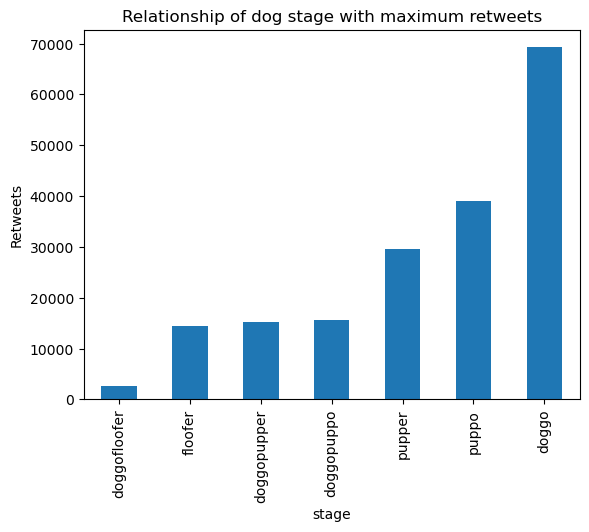

In [90]:
#Defining function for plotting bar charts
def bar_plot(value):
    bar=value.plot(kind='bar', sort_columns=True);
    return bar
stage_retweet_max=master_dataset.groupby('stage')["retweet_count"].max().sort_values()
bar_plot(stage_retweet_max)
plt.title('Relationship of dog stage with maximum retweets')
plt.ylabel('Retweets')
pd.DataFrame(stage_retweet_max)


The ascending order of dog stage in accordance to the retweets;<br>
doggofloofer < floofer < doggopupper < doggopuppo < pupper < puppo < doggo 

## Question 3: What is the relationship of dog stage to favorite count?

In [91]:
#dog stage and max retweet 
stage_like_max=master_dataset.groupby('stage')["favorite_count"].max().sort_values()
stage_like_max

stage
doggofloofer     14352.0
floofer          27418.0
doggopuppo       40274.0
doggopupper      48059.0
pupper          105671.0
puppo           120427.0
doggo           141453.0
Name: favorite_count, dtype: float64

,favorite_count
stage,
doggofloofer,14352.0
floofer,27418.0
doggopuppo,40274.0
doggopupper,48059.0
pupper,105671.0
puppo,120427.0
doggo,141453.0


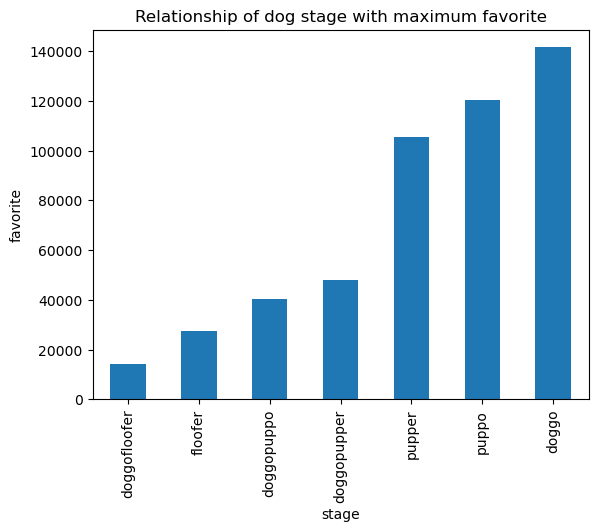

In [92]:
#plotting a bar chart to show relation of dog stage and likes
bar_plot(stage_like_max)
plt.title('Relationship of dog stage with maximum favorite')
plt.ylabel('favorite')
pd.DataFrame(stage_like_max)

The ascending order of dog stage in accordance to the likes;<br>
doggofloofer < floofer < doggopuppo < doggopupper < pupper < puppo < doggo.

## Question 4: What is the correlation between tweets with higher ratings and the favorite?

In [93]:
#finding the tweets relation with ratings and likes
ratings_favorite=master_dataset.groupby('rating_numerator')["favorite_count"].max()
ratings_favorite.sort_values()

rating_numerator
11.26        1539.0
80.00        2084.0
50.00        2136.0
45.00        2204.0
88.00        2369.0
99.00        2541.0
60.00        2632.0
144.00       2716.0
44.00        3086.0
121.00       3421.0
204.00       3459.0
165.00       4357.0
4.00         4400.0
1776.00      4678.0
2.00         4884.0
24.00        4911.0
3.00         5818.0
11.27        6012.0
5.00         9600.0
84.00       11276.0
8.00        11314.0
1.00        12523.0
6.00        14575.0
9.75        16849.0
0.00        20380.0
420.00      21408.0
9.00        31626.0
11.00       32172.0
7.00        32964.0
13.50       38963.0
10.00       69054.0
12.00       78304.0
14.00       80493.0
13.00      141453.0
Name: favorite_count, dtype: float64

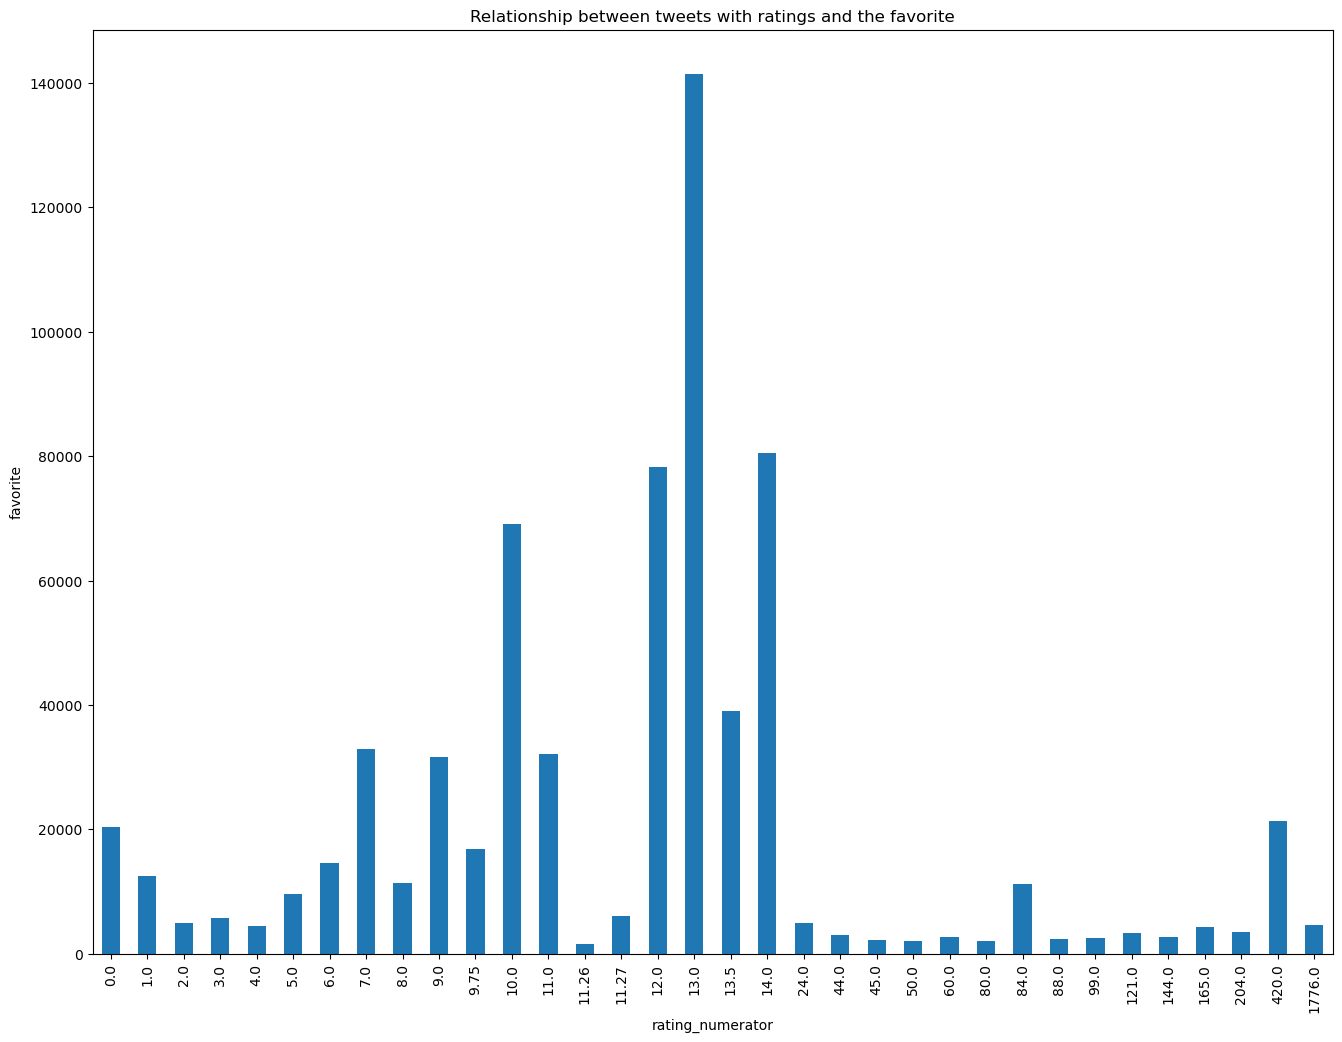

In [255]:
ratings_favorite.plot(kind='bar', figsize=(16,12))
plt.title('Relationship between tweets with ratings and the favorite');
plt.ylabel('favorite');

In [94]:
#getting tweet that receive lowest number of lokes
least_retweeted=master_dataset[master_dataset["rating_numerator"]== 11.26]
least_retweeted

,tweet_id,timestamp,text,name,rating_numerator,rating_denominator,stage,jpg_url,image_number,First_prediction_confident,First_prediction_breed,Second_prediction_confident,Second_prediction_breed,Third_prediction_confident,Third_prediction_breed,First_prediction,Second_prediction,Third_prediction,retweet_count,favorite_count
1359,680494726643068929,2015-12-25,Here we have uncovered an entire battalion of ...,NaN,11.26,10.0,NaN,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,1,0.438627,True,0.111622,True,0.064061,True,Kuvasz,Samoyed,Great_pyrenees,428.0,1539.0


In [95]:
# extract the jpg url of the image for the dog with the least number of retweets
least_retweeted['jpg_url']

1359    https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg
Name: jpg_url, dtype: object

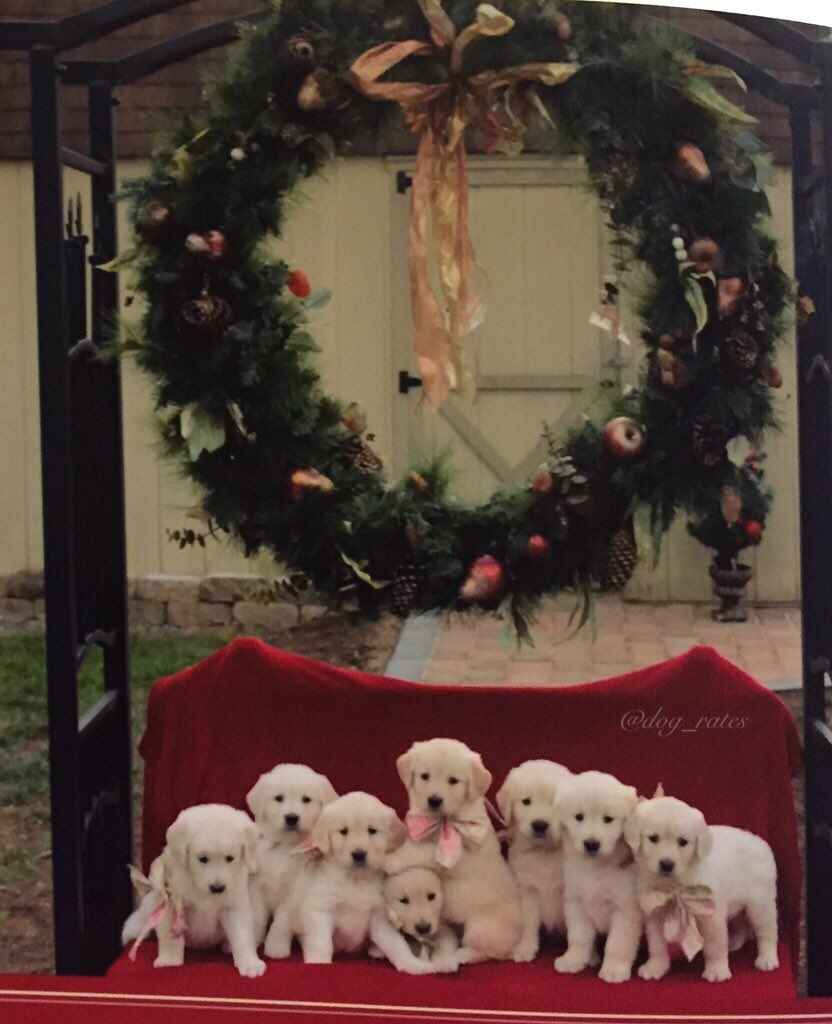

In [97]:
# download and save the least retweeted dog image
least_retweet_jpg = requests.get('https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg').content
with open('least_retweets_image.jpg', 'wb') as file:
     file.write(least_retweet_jpg)
        
from IPython.display import Image

Image(filename = 'least_retweets_image.jpg')

There is no correlation between the retweets and the favorite. A dog with high rating does not mean it has a high number of likes. However, the tweet with a numerator rating of 13.0 receive the highest amounts of likes(141,453) and the tweet with numerator rating of 11.26 has the lowest amount of likes(1,539)

## Question 5: What is the correlation between the retweets  and the favorite?

In [257]:
#find relation of retweets and likes
retweets_favorite=master_dataset.groupby('retweet_count')["favorite_count"].max().sort_values()
retweets_favorite

retweet_count
11.0           63.0
18.0           87.0
37.0           90.0
30.0           92.0
38.0           97.0
             ...   
51723.0    104302.0
29525.0    105671.0
50548.0    108738.0
39015.0    120427.0
69230.0    141453.0
Name: favorite_count, Length: 1485, dtype: float64

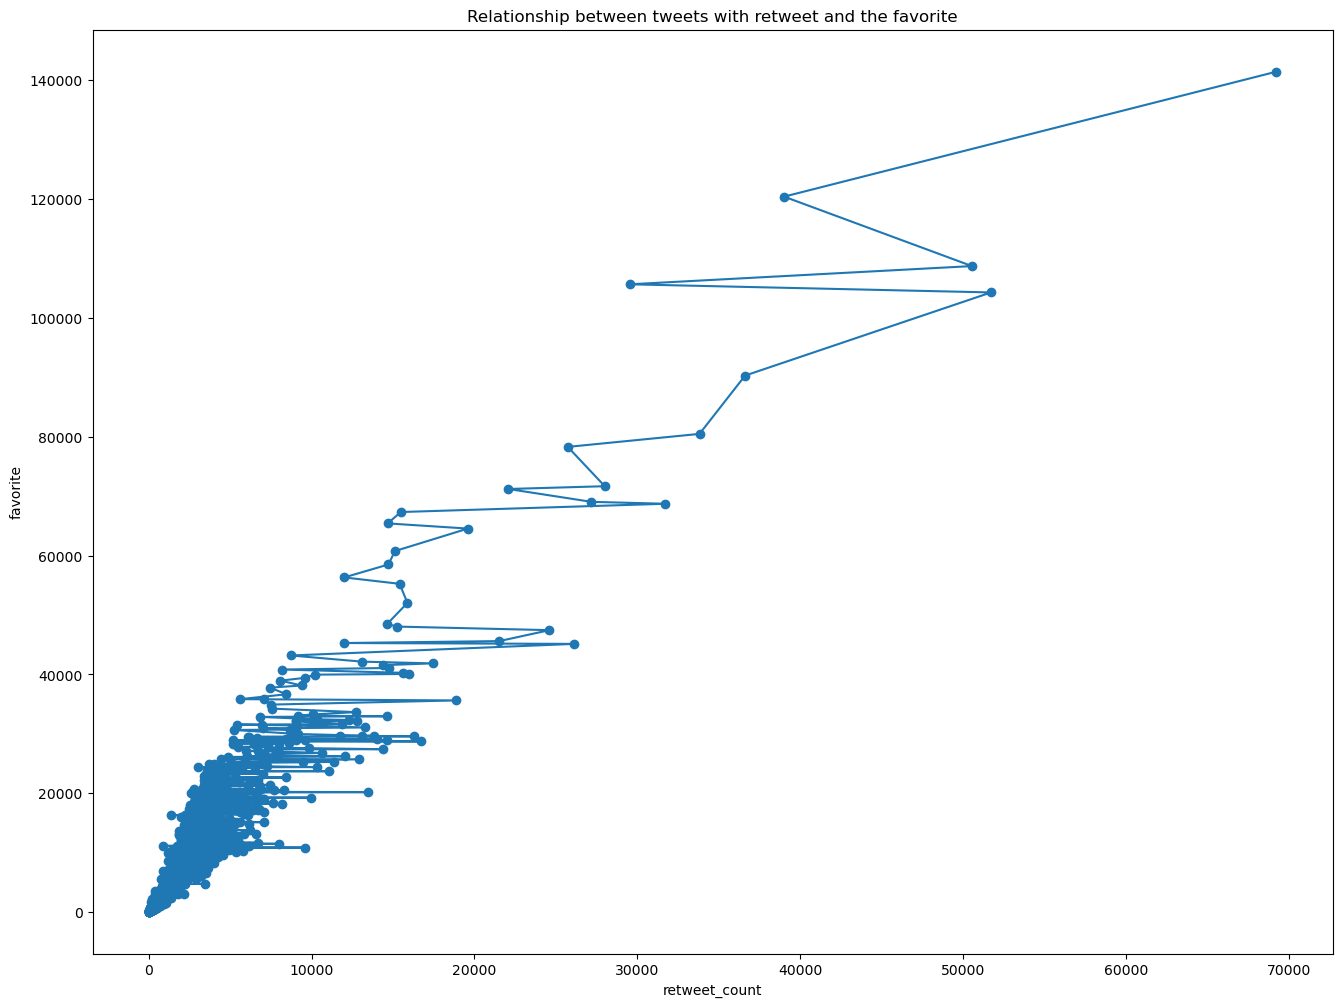

In [258]:
plt.scatter(master_dataset["retweet_count"],master_dataset["favorite_count"])
retweets_favorite.plot(kind='line', figsize=(16,12))
plt.title('Relationship between tweets with retweet and the favorite');
plt.ylabel('favorite');

There is a positive correlation between the retweets and the favorite with the number of reweets increasing as the likes increases.

# Conclusion 
The dataset corrected contained lots of errors which comes from incorrect data on the tweets provided on tweeter. Some the errors can be handled as this information is the one given by the users example is the name of the dog are given as none which makes it hand to know the name of the dog that receive the highest likes and retweets,